In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Supermarket Sales Cleaned.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2,2019


In [29]:
types = df.dtypes
missing_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()
unique_values = df.nunique()

data_summary = pd.DataFrame({
    "Data Types": types,
    "Missing values": missing_values,
    "Duplicated values": duplicated_rows,
    "Unique values": unique_values
})

data_summary['Categorical'] = (unique_values <= 24) # conditon, true and false
cat_var = []
for cat in data_summary[data_summary['Categorical']== True].index.tolist():
  cat_var.append(cat)
print(f'Kolom kategorikal: {cat_var}\n')
data_summary

Kolom kategorikal: ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Quantity', 'Payment', 'gross margin percentage', 'Month', 'Year']



,Data Types,Missing values,Duplicated values,Unique values,Categorical
Invoice ID,object,0,0,1000,False
Branch,object,0,0,3,True
City,object,0,0,3,True
Customer type,object,0,0,2,True
Gender,object,0,0,2,True
Product line,object,0,0,6,True
Unit price,float64,0,0,943,False
Quantity,int64,0,0,10,True
Tax 5%,float64,0,0,990,False
Total,float64,0,0,990,False


In [30]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0


In [31]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2,2019


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8528\1013979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8528\1013979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8528\1013979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8528\1013979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value

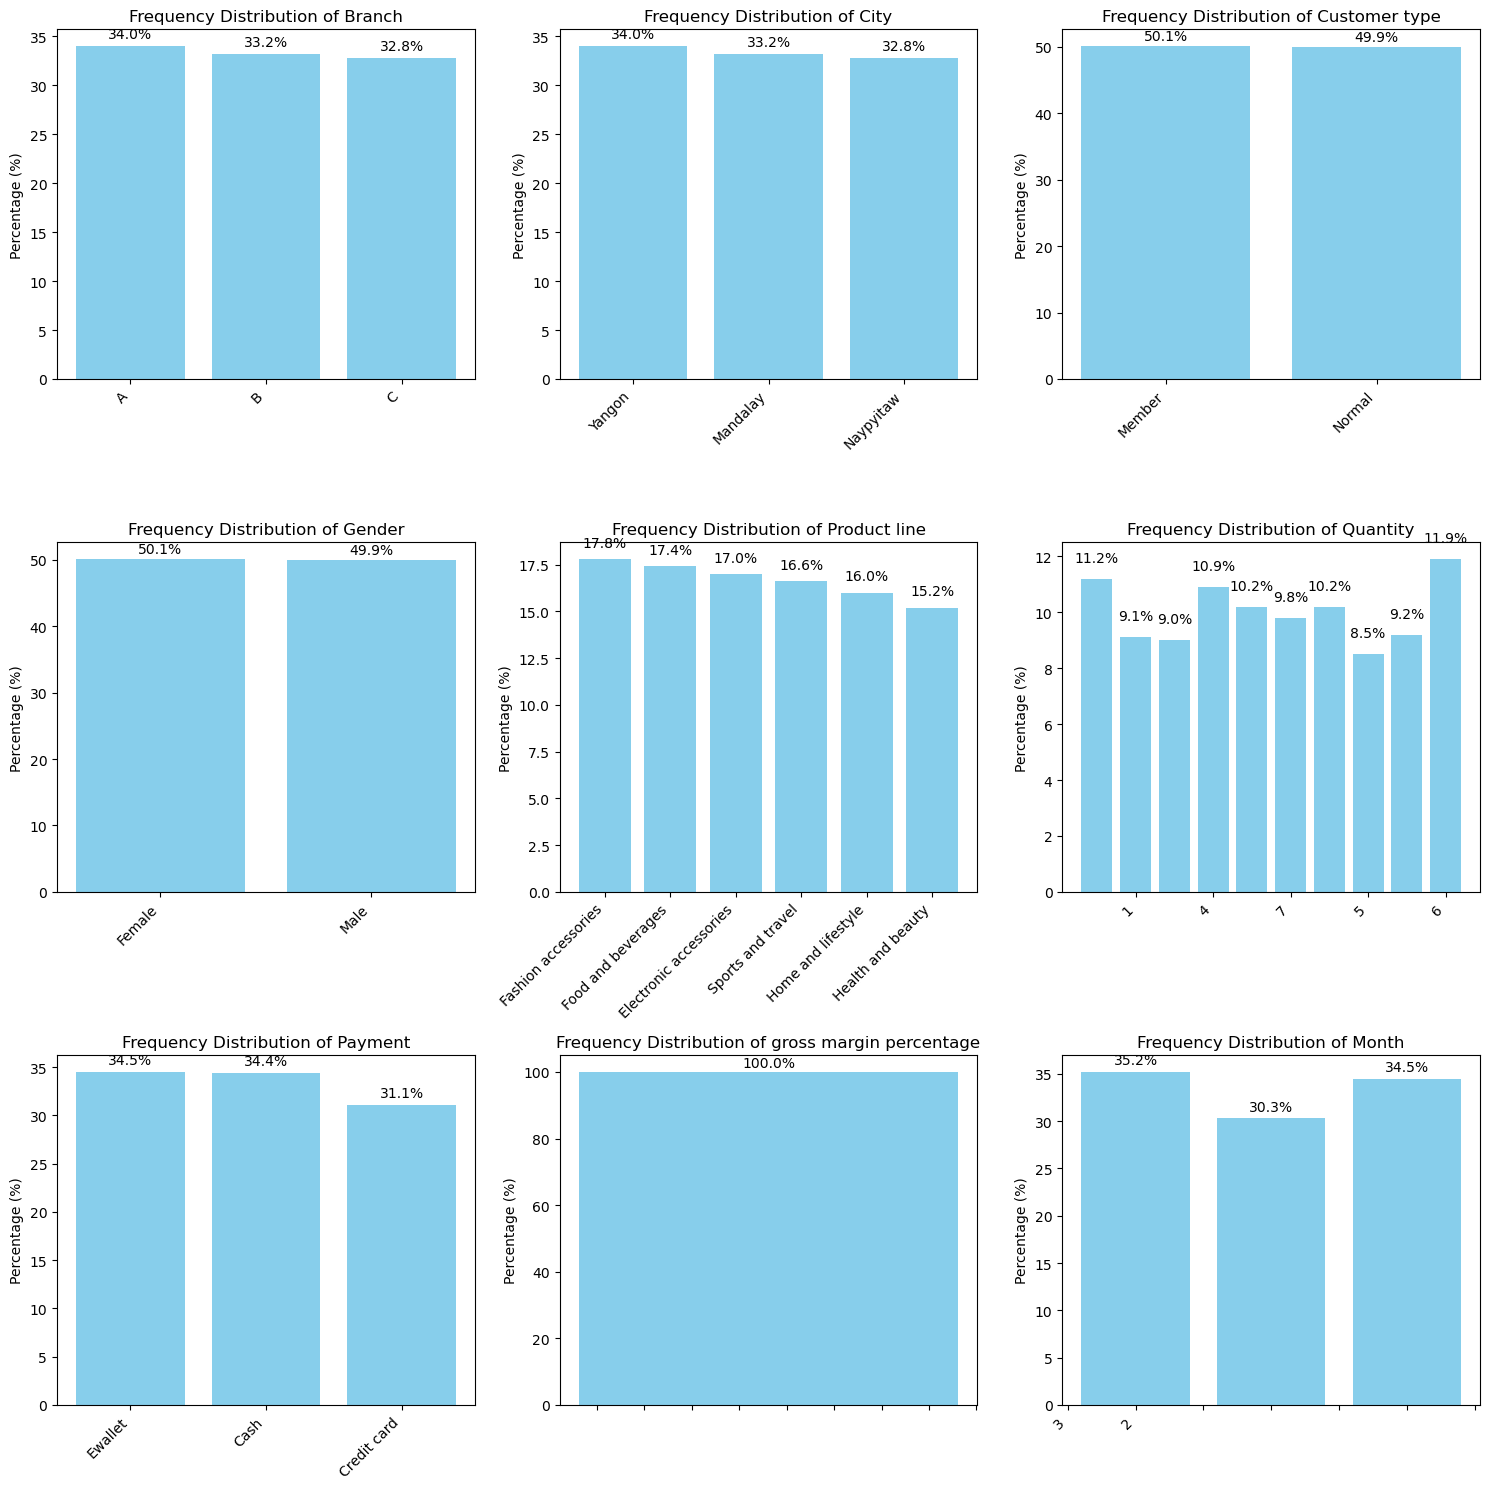

Frequency Distribution of Branch in %:
Branch
A    34.0
B    33.2
C    32.8
Name: proportion, dtype: float64


Frequency Distribution of City in %:
City
Yangon       34.0
Mandalay     33.2
Naypyitaw    32.8
Name: proportion, dtype: float64


Frequency Distribution of Customer type in %:
Customer type
Member    50.1
Normal    49.9
Name: proportion, dtype: float64


Frequency Distribution of Gender in %:
Gender
Female    50.1
Male      49.9
Name: proportion, dtype: float64


Frequency Distribution of Product line in %:
Product line
Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: proportion, dtype: float64


Frequency Distribution of Quantity in %:
Quantity
10    11.9
1     11.2
4     10.9
7     10.2
5     10.2
6      9.8
9      9.2
2      9.1
3      9.0
8      8.5
Name: proportion, dtype: float64


Frequency Distribution of Payment in %:
Payment


In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(cat_var):
    if i < len(axes):
        value_counts = df[column].value_counts(normalize=True) * 100
        value_counts = value_counts.sort_values(ascending=False)
        ax = axes[i]
        bars = ax.bar(value_counts.index, value_counts.values, color='skyblue')
        ax.set_title(f'Frequency Distribution of {column}')
        ax.set_ylabel('Percentage (%)')
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

        # Add text labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2.0,
                height + 0.5,
                f'{height:.1f}%',
                ha='center',
                va='bottom'
            )

for i in range(len(cat_var), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

for column in cat_var:
    print(f"Frequency Distribution of {column} in %:")
    print(df[column].value_counts(normalize=True) * 100)
    print("\n")

In [33]:
df = df.astype(str)


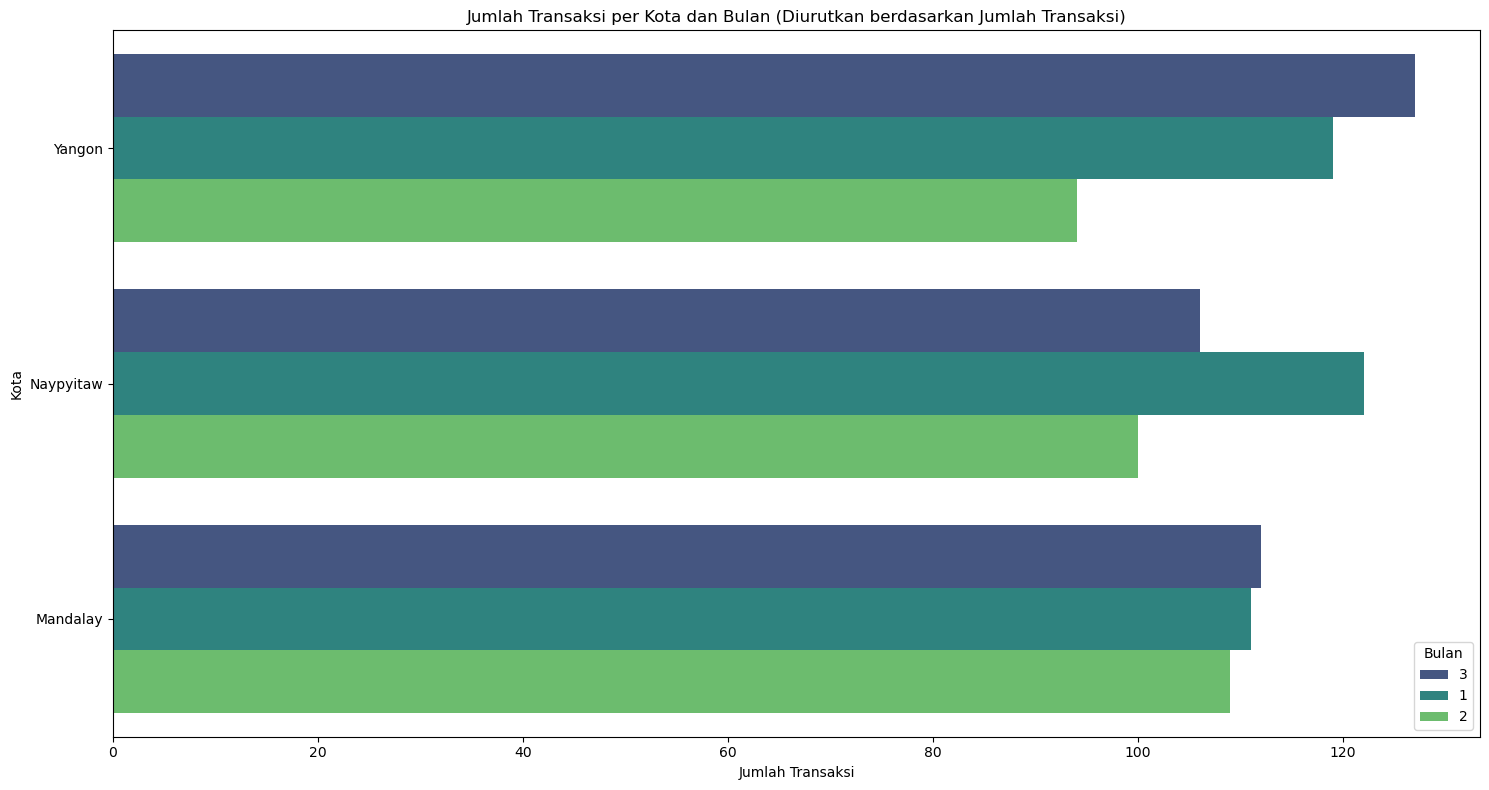

Jumlah Transaksi per Kota dan Bulan:
        City Month  Transaction Count
8     Yangon     3                127
3  Naypyitaw     1                122
6     Yangon     1                119
2   Mandalay     3                112
0   Mandalay     1                111
1   Mandalay     2                109
5  Naypyitaw     3                106
4  Naypyitaw     2                100
7     Yangon     2                 94

Bulan dengan Jumlah Transaksi Tertinggi di Setiap Kota:
        City Month  Transaction Count
2   Mandalay     3                112
3  Naypyitaw     1                122
8     Yangon     3                127


In [34]:
city_month_transactions = df.groupby(['City', 'Month'])['Invoice ID'].count().reset_index()

city_month_transactions = city_month_transactions.rename(columns={'Invoice ID': 'Transaction Count'})

city_month_transactions = city_month_transactions.sort_values('Transaction Count', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Transaction Count', y='City', hue='Month', data=city_month_transactions, palette='viridis')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kota')
plt.title('Jumlah Transaksi per Kota dan Bulan (Diurutkan berdasarkan Jumlah Transaksi)')
plt.legend(title='Bulan')
plt.tight_layout()
plt.show()

print("Jumlah Transaksi per Kota dan Bulan:")
print(city_month_transactions)

highest_transactions_per_city = city_month_transactions.loc[city_month_transactions.groupby('City')['Transaction Count'].idxmax()]

print("\nBulan dengan Jumlah Transaksi Tertinggi di Setiap Kota:")
print(highest_transactions_per_city)

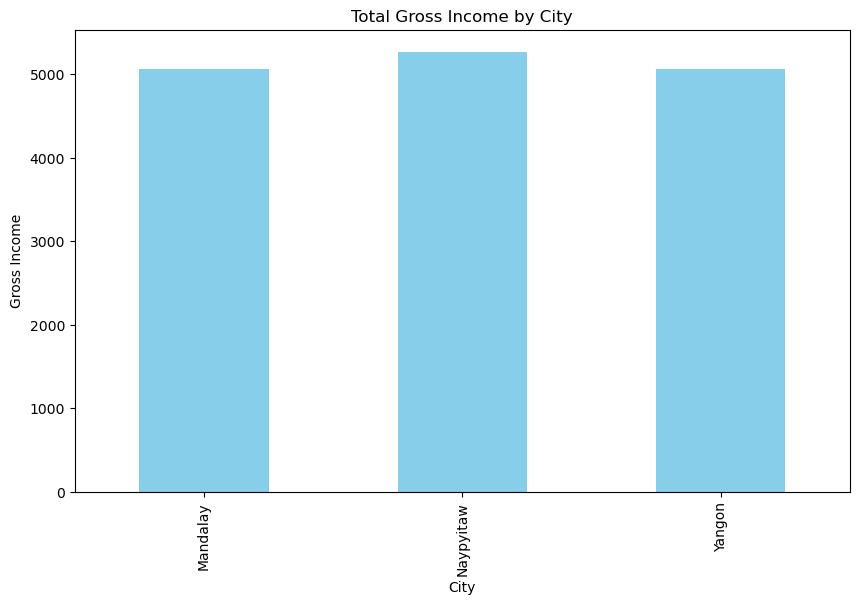

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi kolom 'gross income' ke numerik
df['gross income'] = pd.to_numeric(df['gross income'], errors='coerce')

# Hilangkan nilai NaN
df = df.dropna(subset=['gross income'])

# Grouping data
city_gross_income = df.groupby('City')['gross income'].sum()

# Plot hasilnya
plt.figure(figsize=(10, 6))
city_gross_income.plot(kind='bar', color='skyblue')
plt.title('Total Gross Income by City')
plt.xlabel('City')
plt.ylabel('Gross Income')
plt.show()


In [36]:
city_gross = df.groupby('City')['gross income'].sum()

total_gross = city_gross.sum()
city_percentage = (city_gross / total_gross) * 100

city_percentage = city_percentage.sort_values(ascending=False)

print("Persentase Gross Income per Kota:")
for city, percentage in city_percentage.items():
  print(f"{city}: {percentage:.2f}%")

most_profitable_city = city_percentage.idxmax()
highest_percentage = city_percentage.max()

print(f"\nKota yang paling menguntungkan adalah {most_profitable_city} dengan persentase {highest_percentage:.2f}% dari total gross income.")

Persentase Gross Income per Kota:
Naypyitaw: 34.24%
Yangon: 32.88%
Mandalay: 32.88%

Kota yang paling menguntungkan adalah Naypyitaw dengan persentase 34.24% dari total gross income.


        City Month  gross income  Percentage
3  Naypyitaw     1     1925.4610   12.519766
6     Yangon     1     1841.9585   11.976815
8     Yangon     3     1793.2915   11.660371
5  Naypyitaw     3     1771.3830   11.517917
0   Mandalay     1     1770.2885   11.510801
2   Mandalay     3     1647.4925   10.712354
1   Mandalay     2     1639.2510   10.658766
4  Naypyitaw     2     1568.3325   10.197639
7     Yangon     2     1421.9105    9.245571


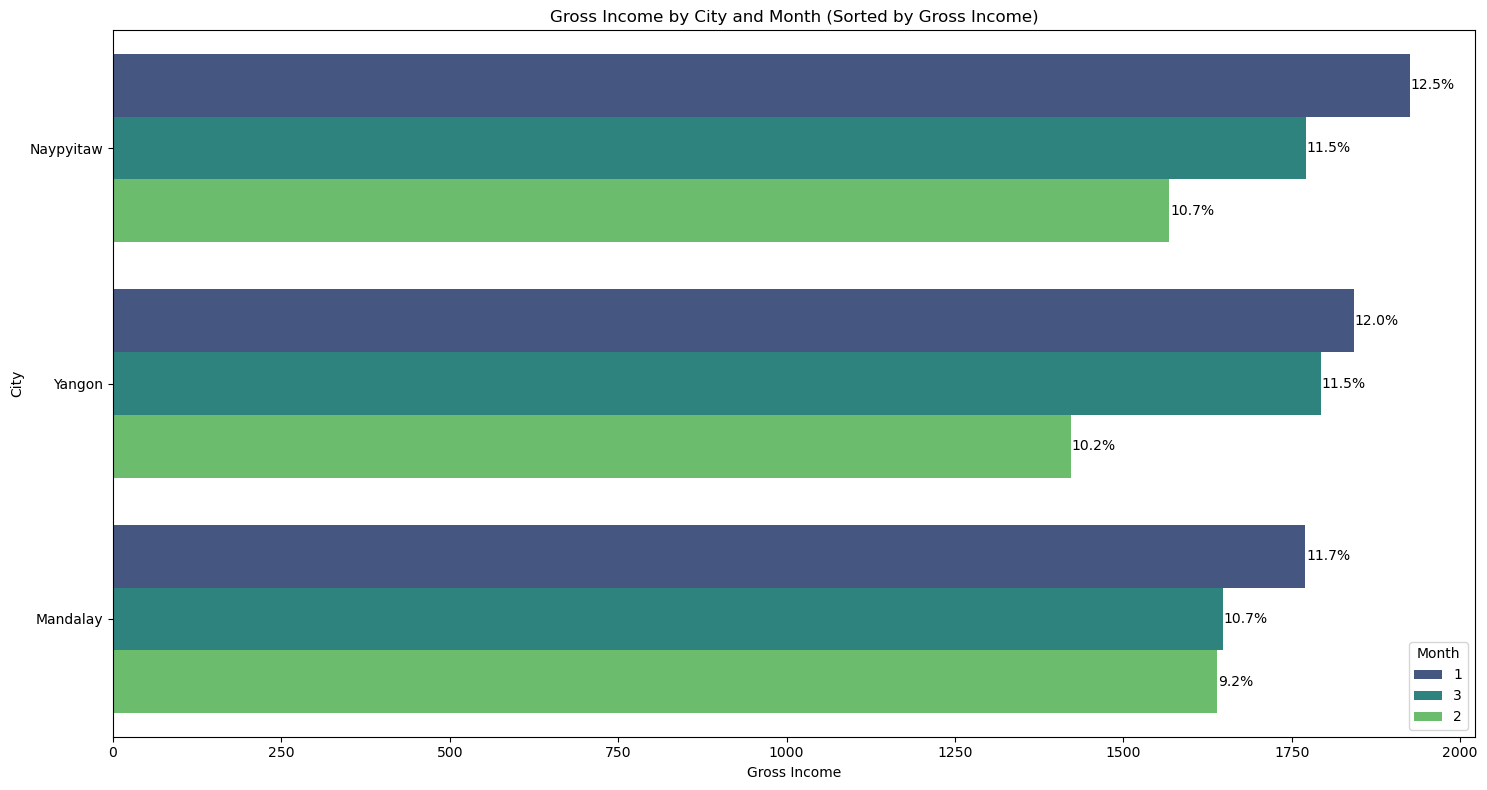

In [37]:
city_month_gross = df.groupby(['City', 'Month'])['gross income'].sum().reset_index()

city_month_gross = city_month_gross.sort_values('gross income', ascending=False)

total_gross = city_month_gross['gross income'].sum()
city_month_gross['Percentage'] = (city_month_gross['gross income'] / total_gross) * 100

print(city_month_gross)

plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='gross income', y='City', hue='Month', data=city_month_gross, palette='viridis')
plt.xlabel('Gross Income')
plt.ylabel('City')
plt.title('Gross Income by City and Month (Sorted by Gross Income)')

for i, p in enumerate(bar_plot.patches):

    if p.get_width() > 0:  
        width = p.get_width()
        plt.text(width + 1, p.get_y() + p.get_height() / 2,
                 f'{city_month_gross["Percentage"].iloc[i % len(city_month_gross)]:.1f}%',
                 ha='left', va='center')

plt.legend(title='Month')
plt.tight_layout()
plt.show()

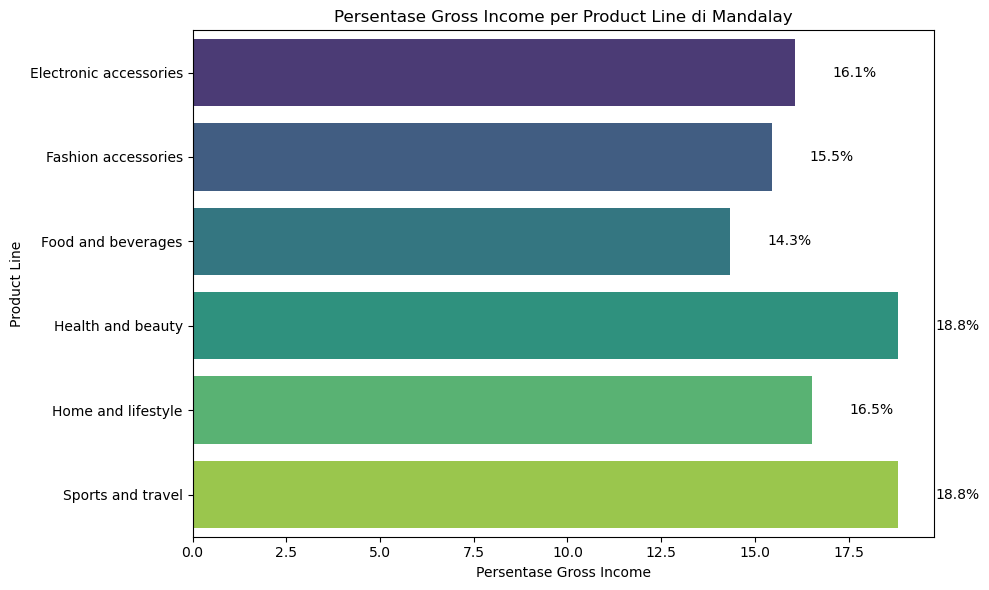

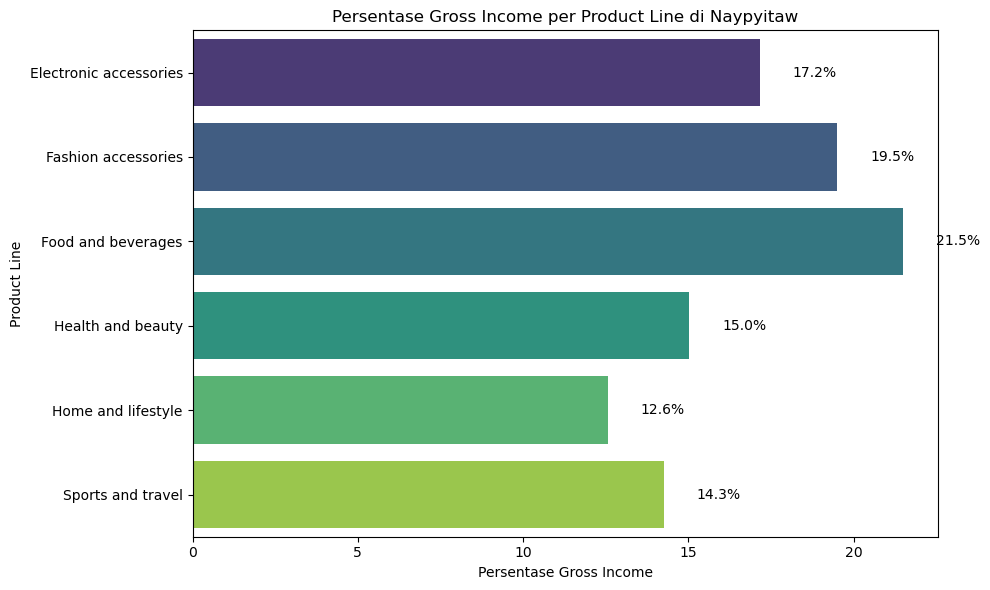

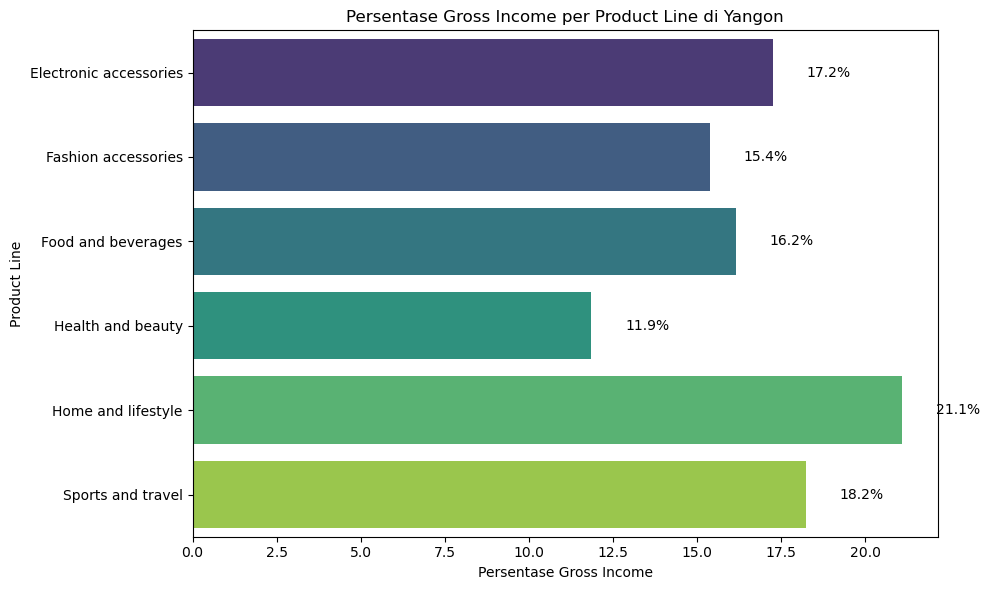

In [38]:
city_product_gross = df.groupby(['City', 'Product line'])['gross income'].sum().reset_index()


city_product_gross['Percentage'] = city_product_gross.groupby('City')['gross income'].transform(lambda x: (x / x.sum()) * 100)


for city in city_product_gross['City'].unique():
  city_data = city_product_gross[city_product_gross['City'] == city]

  plt.figure(figsize=(10, 6))
  plt.title(f'Persentase Gross Income per Product Line di {city}')
  sns.barplot(x='Percentage', y='Product line', data=city_data, palette='viridis')
  plt.xlabel('Persentase Gross Income')
  plt.ylabel('Product Line')

  for i, p in enumerate(plt.gca().patches):
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{city_data["Percentage"].iloc[i]:.1f}%', ha='left', va='center')

  plt.tight_layout()
plt.show()

In [39]:
city_product_gross_income = df.groupby(['City', 'Product line'])['gross income'].sum().unstack()

city_product_gross_income_percentage = city_product_gross_income.div(city_product_gross_income.sum(axis=1), axis=0) * 100

for city in city_product_gross_income_percentage.index:
  print(f"\nCity: {city}")
  sorted_product_lines = city_product_gross_income_percentage.loc[city].sort_values(ascending=False)
  print(sorted_product_lines)


City: Mandalay
Product line
Sports and travel         18.821692
Health and beauty         18.814593
Home and lifestyle        16.524999
Electronic accessories    16.056325
Fashion accessories       15.455439
Food and beverages        14.326951
Name: Mandalay, dtype: float64

City: Naypyitaw
Product line
Food and beverages        21.495101
Fashion accessories       19.499251
Electronic accessories    17.155826
Health and beauty         15.027151
Sports and travel         14.255325
Home and lifestyle        12.567347
Name: Naypyitaw, dtype: float64

City: Yangon
Product line
Home and lifestyle        21.108397
Sports and travel         18.241650
Electronic accessories    17.247693
Food and beverages        16.161055
Fashion accessories       15.378956
Health and beauty         11.862250
Name: Yangon, dtype: float64



Product Line dengan Jumlah Transaksi Tertinggi untuk Setiap Gender:
   Gender         Product line  Transaction Count
1  Female  Fashion accessories                 96
9    Male    Health and beauty                 88


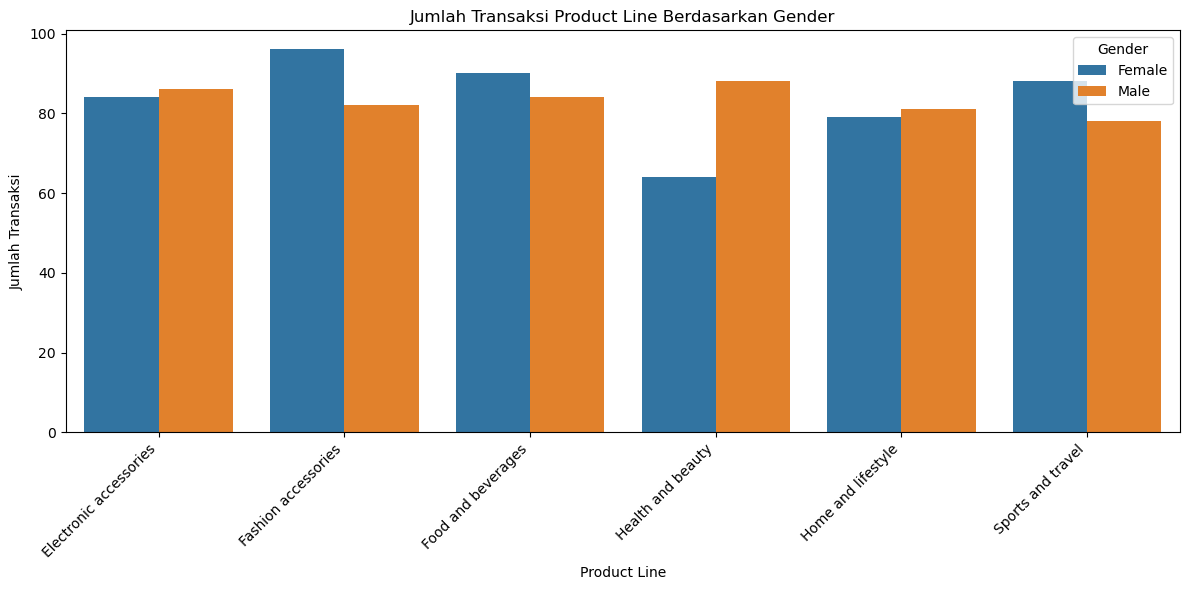

In [40]:
gender_product_transactions = df.groupby(['Gender', 'Product line'])['Invoice ID'].count().reset_index()

gender_product_transactions = gender_product_transactions.rename(columns={'Invoice ID': 'Transaction Count'})

highest_transactions_per_gender = gender_product_transactions.loc[gender_product_transactions.groupby('Gender')['Transaction Count'].idxmax()]

print("\nProduct Line dengan Jumlah Transaksi Tertinggi untuk Setiap Gender:")
print(highest_transactions_per_gender)

plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Transaction Count', hue='Gender', data=gender_product_transactions)
plt.xlabel('Product Line')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Product Line Berdasarkan Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

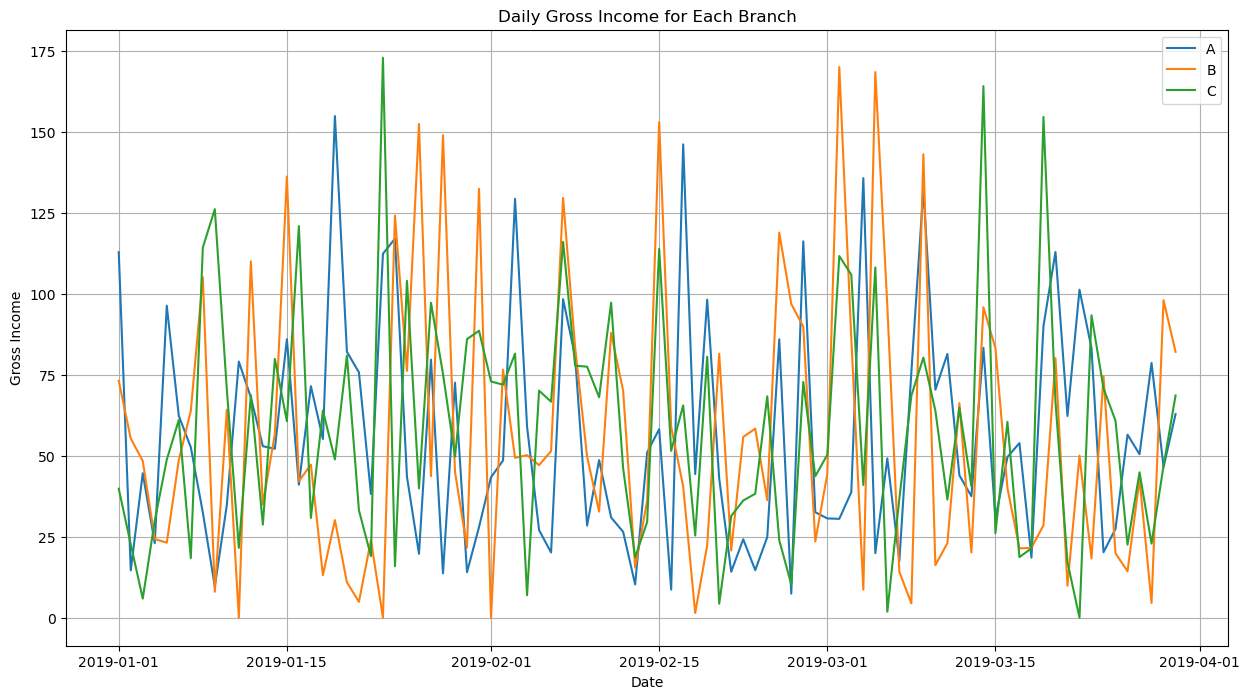

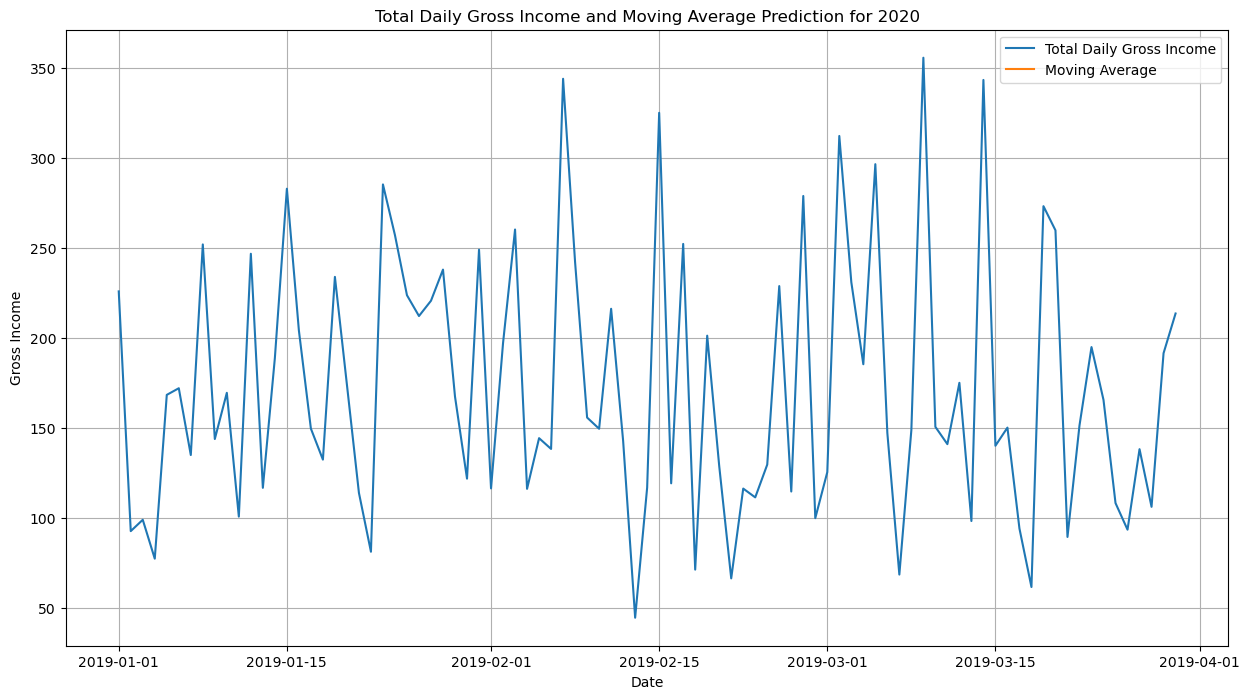

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

daily_gross_income = df.groupby(['Date', 'Branch'])['gross income'].sum().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
for branch in daily_gross_income.columns:
    plt.plot(daily_gross_income.index, daily_gross_income[branch], label=branch)

plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.title('Daily Gross Income for Each Branch')
plt.legend()
plt.grid(True)
plt.show()

total_daily_gross_income = df.groupby('Date')['gross income'].sum()

window_size = 7  
moving_average = total_daily_gross_income.rolling(window=window_size).mean()
prediction_df = pd.DataFrame({'Date': pd.date_range(start='2020-01-01', end='2020-12-31')})

extended_moving_average = pd.concat([
    moving_average,
    pd.Series(index=prediction_df['Date'], dtype='float64')
])

extended_moving_average = extended_moving_average.reindex(prediction_df['Date'])

extended_moving_average = extended_moving_average.interpolate(method='linear')

plt.figure(figsize=(15, 8))
plt.plot(total_daily_gross_income.index, total_daily_gross_income, label='Total Daily Gross Income')
plt.plot(extended_moving_average.index, extended_moving_average, label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.title('Total Daily Gross Income and Moving Average Prediction for 2020')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
city_month_product_transactions = df.groupby(['City', 'Month', 'Product line'])['Invoice ID'].count().reset_index()

city_month_product_transactions = city_month_product_transactions.rename(columns={'Invoice ID': 'Transaction Count'})

highest_transactions_per_city_month = city_month_product_transactions.loc[city_month_product_transactions.groupby(['City', 'Month'])['Transaction Count'].idxmax()]

print("\nProduct Line dengan Jumlah Transaksi Tertinggi di Setiap Kota dan Bulan:")
print(highest_transactions_per_city_month)


Product Line dengan Jumlah Transaksi Tertinggi di Setiap Kota dan Bulan:
         City Month            Product line  Transaction Count
5    Mandalay     1       Sports and travel                 23
7    Mandalay     2     Fashion accessories                 24
16   Mandalay     3      Home and lifestyle                 22
19  Naypyitaw     1     Fashion accessories                 23
26  Naypyitaw     2      Food and beverages                 24
30  Naypyitaw     3  Electronic accessories                 23
40     Yangon     1      Home and lifestyle                 27
44     Yangon     2      Food and beverages                 21
52     Yangon     3      Home and lifestyle                 25


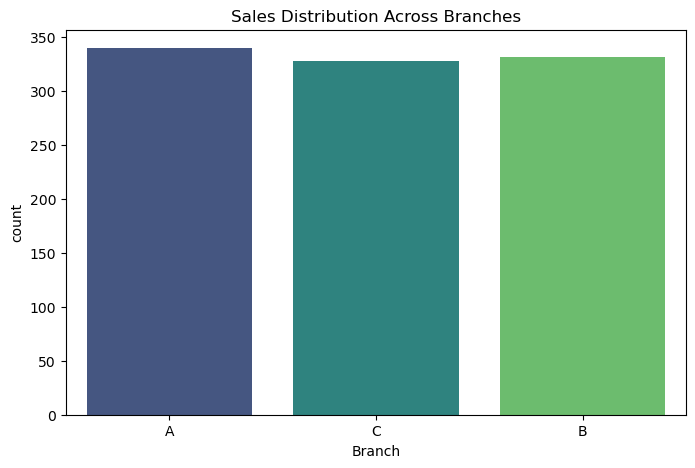

In [43]:
# Distribution of sales across different branches
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Branch', palette='viridis')
plt.title('Sales Distribution Across Branches')
plt.show()

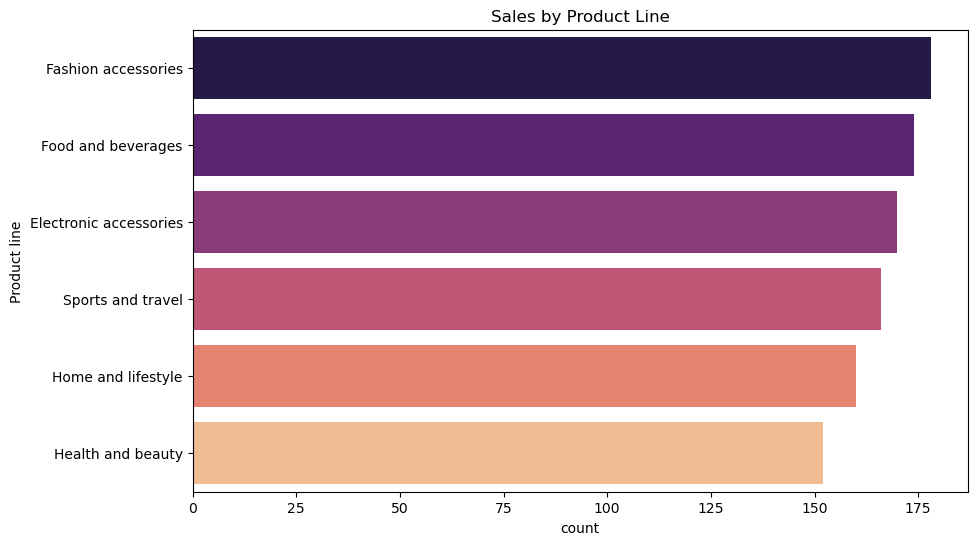

In [44]:
# Sales by product line
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Product line', order=df['Product line'].value_counts().index, palette='magma')
plt.title('Sales by Product Line')
plt.show()

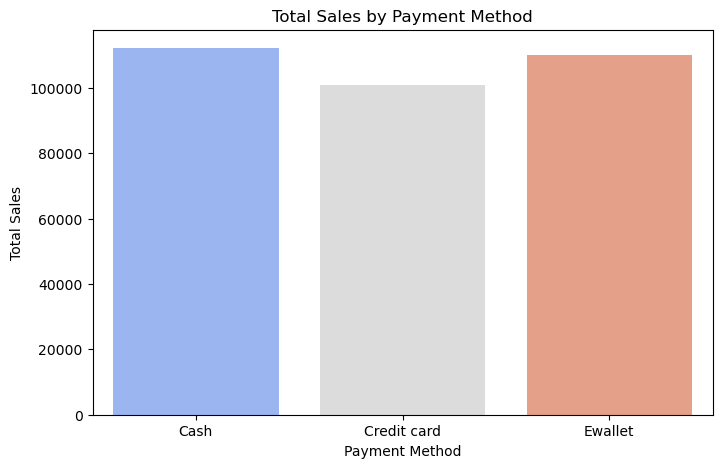

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom 'Total' ke numerik
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Hilangkan nilai NaN
df = df.dropna(subset=['Total'])

# Grouping data berdasarkan Payment
payment_sales = df.groupby('Payment')['Total'].sum().reset_index()

# Membuat plot
plt.figure(figsize=(8, 5))
sns.barplot(data=payment_sales, x='Payment', y='Total', palette='coolwarm')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()
